# EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
import kagglehub
import os

# Download the dataset and get the path to the directory
path = kagglehub.dataset_download("alanvourch/tmdb-movies-daily-updates")

# List all files in the directory to find the CSV file
files = os.listdir(path)
print("Files in dataset:", files)

csv_file = next((f for f in files if "movies" in f and f.endswith(".csv")), None)

if csv_file:
    full_path = os.path.join(path, csv_file)
    df = pd.read_csv(full_path)
    print("Data preview:")
    print(df.head())
else:
    print("CSV file not found in the downloaded dataset.")


Files in dataset: ['TMDB_all_movies.csv']
Data preview:
   id                             title  vote_average  vote_count    status  \
0   2                             Ariel           7.1       335.0  Released   
1   3               Shadows in Paradise           7.3       369.0  Released   
2   5                        Four Rooms           5.8      2623.0  Released   
3   6                    Judgment Night           6.5       331.0  Released   
4   8  Life in Loops (A Megacities RMX)           7.5        27.0  Released   

  release_date     revenue  runtime      budget    imdb_id  ...  \
0   1988-10-21         0.0     73.0         0.0  tt0094675  ...   
1   1986-10-17         0.0     74.0         0.0  tt0092149  ...   
2   1995-12-09   4257354.0     98.0   4000000.0  tt0113101  ...   
3   1993-10-15  12136938.0    109.0  21000000.0  tt0107286  ...   
4   2006-01-01         0.0     80.0     42000.0  tt0825671  ...   

                         spoken_languages  \
0                    

In [4]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (1015435, 28)


In [5]:
print(f'Dataset info:')
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015435 entries, 0 to 1015434
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1015435 non-null  int64  
 1   title                    1015424 non-null  object 
 2   vote_average             1015433 non-null  float64
 3   vote_count               1015433 non-null  float64
 4   status                   1015433 non-null  object 
 5   release_date             902990 non-null   object 
 6   revenue                  1015433 non-null  float64
 7   runtime                  1015433 non-null  float64
 8   budget                   1015433 non-null  float64
 9   imdb_id                  589850 non-null   object 
 10  original_language        1015433 non-null  object 
 11  original_title           1015424 non-null  object 
 12  overview                 836663 non-null   object 
 13  popularity               101

### There are several columns that are not meaningful for our analysis:

1. **id** and **imdb_id** contain only identifiers
2. **overview** has summary of the movie's plot which is long text data
3. **poster_path** has link to movie's poster



In [6]:
df = df.drop(columns=['id', 'imdb_id', 'overview', 'poster_path'])

In [7]:
print(f'Shape of the dataset after dropping: {df.shape}')

Shape of the dataset after dropping: (1015435, 24)


In [8]:
print('Number of missing values:')
print(df.isnull().sum())

Number of missing values:
title                          11
vote_average                    2
vote_count                      2
status                          2
release_date               112445
revenue                         2
runtime                         2
budget                          2
original_language               2
original_title                 11
popularity                      2
tagline                    864819
genres                     294730
production_companies       546983
production_countries       401156
spoken_languages           389998
cast                       337750
director                   183308
director_of_photography    771927
writers                    523734
producers                  692513
music_composer             916329
imdb_rating                586527
imdb_votes                 586527
dtype: int64


### We will drop the rows with missing **imdb_rating**, which is our target for this project

In [9]:
rows_before = df.shape[0]
df = df.dropna(subset=['imdb_rating'])
rows_after = df.shape[0]
print(f'Shape of the data after removing NA: {df.shape}')
print(f'Number of rows dropped: {rows_before - rows_after}')

Shape of the data after removing NA: (428908, 24)
Number of rows dropped: 586527


In [10]:
print('Number of missing values:')
print(df.isnull().sum())

Number of missing values:
title                           0
vote_average                    0
vote_count                      0
status                          0
release_date                 8186
revenue                         0
runtime                         0
budget                          0
original_language               0
original_title                  0
popularity                      0
tagline                    336386
genres                      54168
production_companies       155071
production_countries        95701
spoken_languages            93334
cast                        63280
director                    26966
director_of_photography    267781
writers                    130202
producers                  226901
music_composer             345648
imdb_rating                     0
imdb_votes                      0
dtype: int64


### We will also remove the rows with missing release_date since it only contains a small portion of data.

In [11]:
df = df.dropna(subset=['release_date'])
print(f'Shape of the data after removing NA: {df.shape}')

Shape of the data after removing NA: (420722, 24)


In [12]:
print(f'Dataset info:')
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 420722 entries, 0 to 1015340
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   title                    420722 non-null  object 
 1   vote_average             420722 non-null  float64
 2   vote_count               420722 non-null  float64
 3   status                   420722 non-null  object 
 4   release_date             420722 non-null  object 
 5   revenue                  420722 non-null  float64
 6   runtime                  420722 non-null  float64
 7   budget                   420722 non-null  float64
 8   original_language        420722 non-null  object 
 9   original_title           420722 non-null  object 
 10  popularity               420722 non-null  float64
 11  tagline                  91291 non-null   object 
 12  genres                   372365 non-null  object 
 13  production_companies     273061 non-null  object 

## Target column

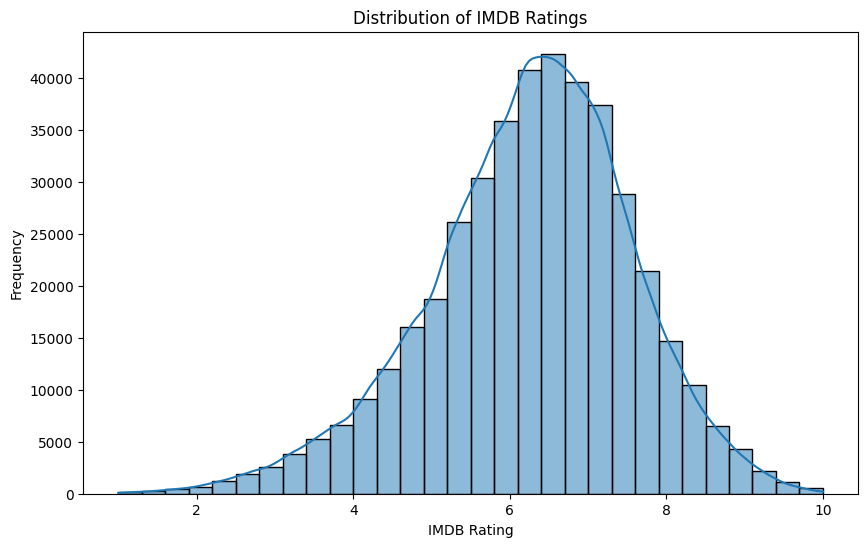

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_rating'], bins=30, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

## Input variables
### vote_count & vote_average

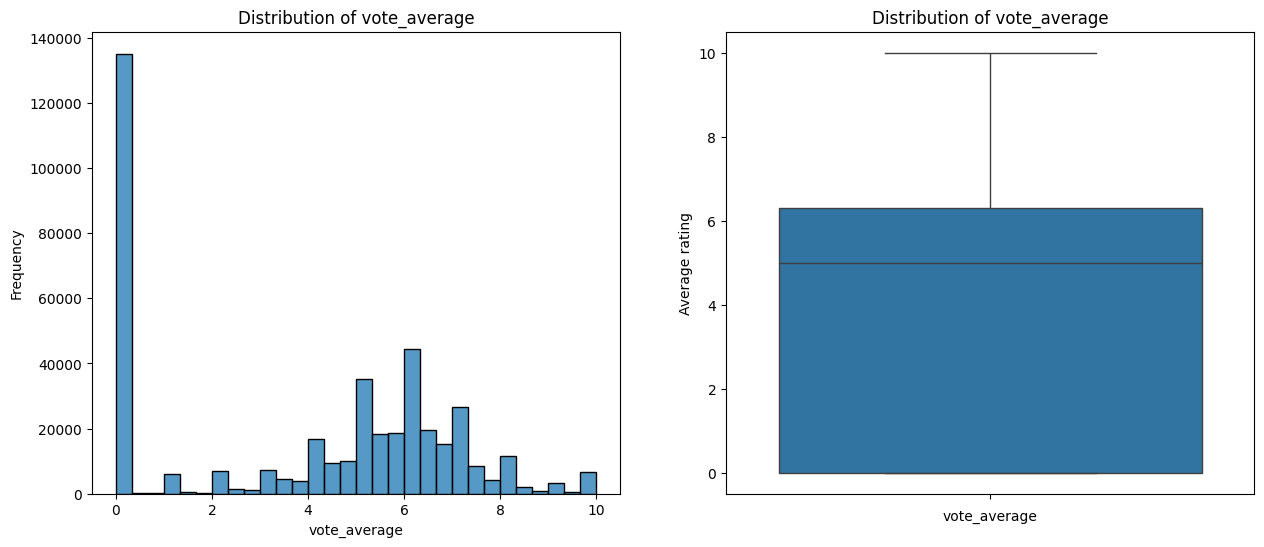

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['vote_average'], bins=30, ax=ax[0])
ax[0].set_title('Distribution of vote_average')
ax[0].set_xlabel('vote_average')
ax[0].set_ylabel('Frequency')
sns.boxplot(df['vote_average'], ax=ax[1])
ax[1].set_title('Distribution of vote_average')
ax[1].set_xlabel('vote_average')
ax[1].set_ylabel('Average rating')
plt.show()

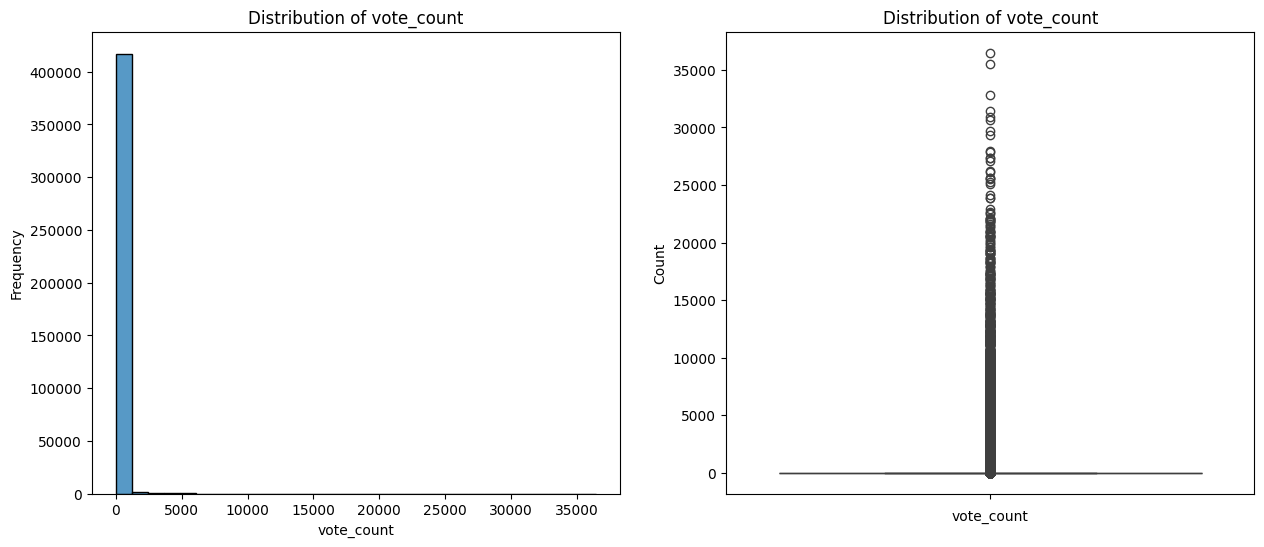

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['vote_count'], bins=30, ax=ax[0])
ax[0].set_title('Distribution of vote_count')
ax[0].set_xlabel('vote_count')
ax[0].set_ylabel('Frequency')
sns.boxplot(df['vote_count'], ax=ax[1])
ax[1].set_title('Distribution of vote_count')
ax[1].set_xlabel('vote_count')
ax[1].set_ylabel('Count')
plt.show()

This is a highly skewed graph. It is not the result of any weird outliers, but the result of having too many movies with a every small number of vote_count and vote_average of zero.\
Let's see their distributions putting together.

Text(0.5, 1.0, 'Scatterplot of vote_average vs vote_count')

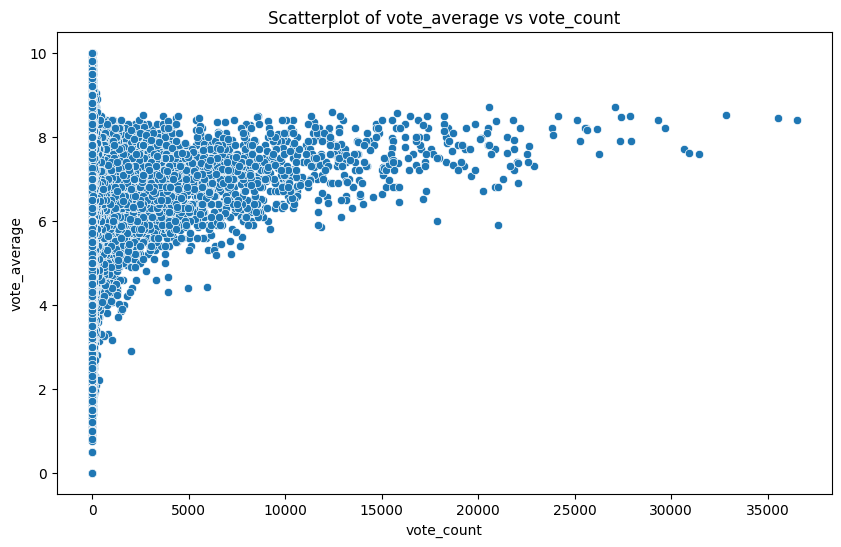

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='vote_average', data=df)
plt.title('Scatterplot of vote_average vs vote_count')

Now we will try to check the distribution without movies with zero votes.

In [17]:
vote_df = df[['vote_average', 'vote_count']]
rows_before = vote_df.shape[0]
vote_df = vote_df[vote_df['vote_count'] > 0]
rows_after = vote_df.shape[0]
print(f'Number of movies with zero votes: {rows_before - rows_after}')

Number of movies with zero votes: 134984


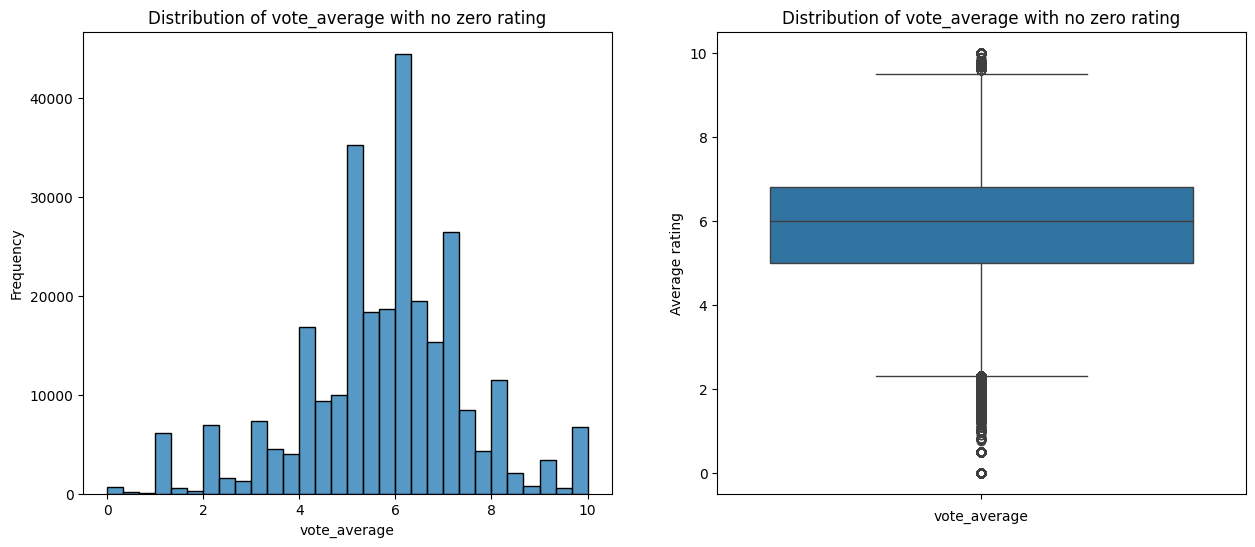

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(vote_df['vote_average'], bins=30, ax=ax[0])
ax[0].set_title('Distribution of vote_average with no zero rating')
ax[0].set_xlabel('vote_average')
ax[0].set_ylabel('Frequency')
sns.boxplot(vote_df['vote_average'], ax=ax[1])
ax[1].set_title('Distribution of vote_average with no zero rating')
ax[1].set_xlabel('vote_average')
ax[1].set_ylabel('Average rating')
plt.show()

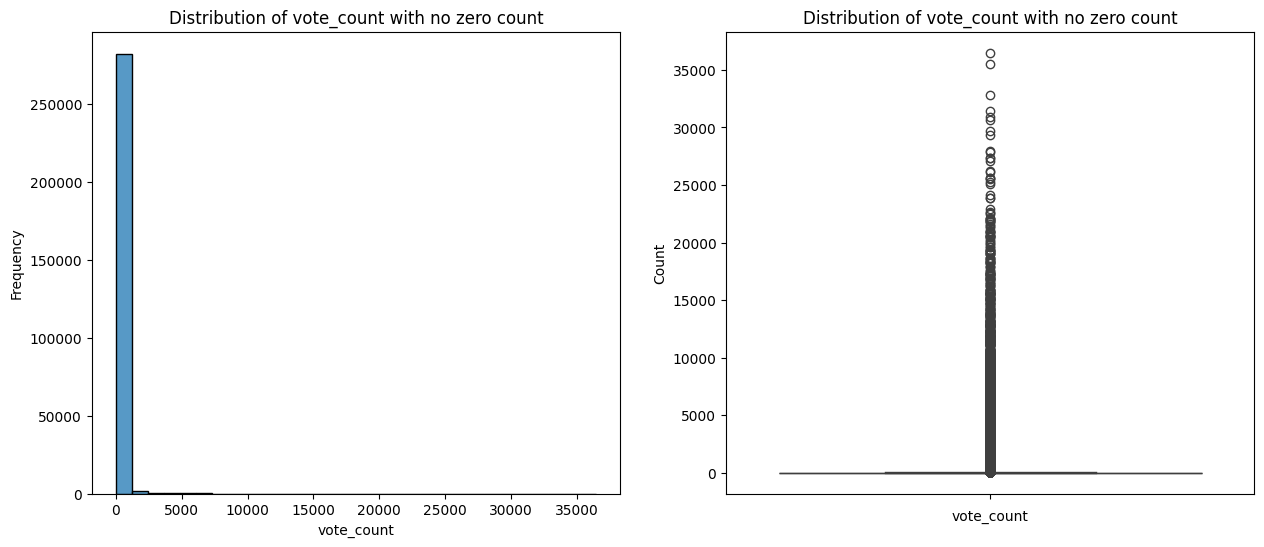

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(vote_df['vote_count'], bins=30, ax=ax[0])
ax[0].set_title('Distribution of vote_count with no zero count')
ax[0].set_xlabel('vote_count')
ax[0].set_ylabel('Frequency')
sns.boxplot(vote_df['vote_count'], ax=ax[1])
ax[1].set_title('Distribution of vote_count with no zero count')
ax[1].set_xlabel('vote_count')
ax[1].set_ylabel('Count')
plt.show()

The distribution of vote_count is still highly skewed since there is a lot of movies with only a small number of votes.

### Status

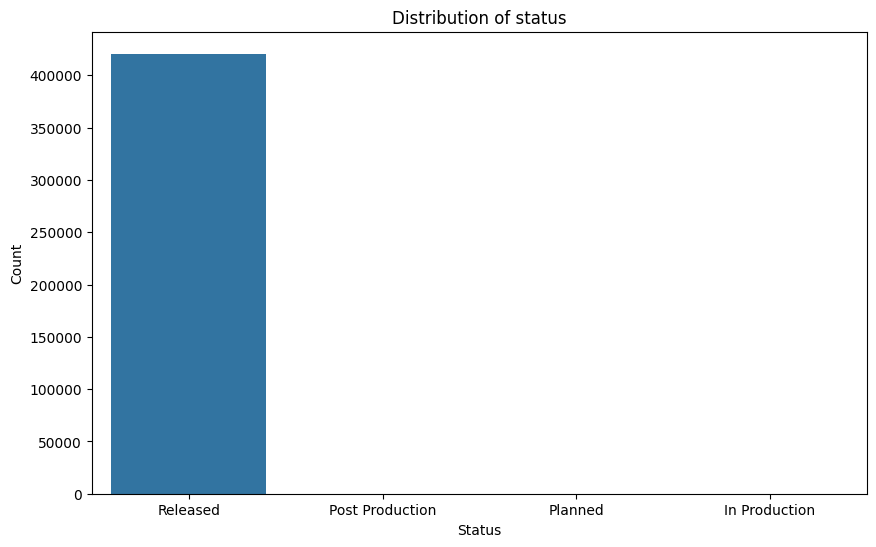

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['status'])
plt.title('Distribution of status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [21]:
df['status'].value_counts()

,count
status,
Released,420669
Post Production,33
In Production,15
Planned,5


## release_date

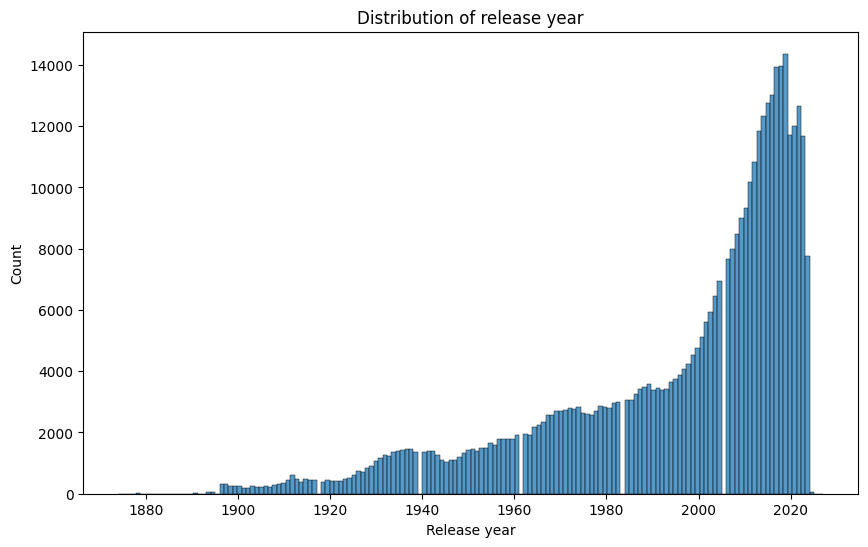

In [22]:
dates = pd.to_datetime(df['release_date'])
plt.figure(figsize=(10, 6))
sns.histplot(dates.dt.year)
plt.title('Distribution of release year')
plt.xlabel('Release year')
plt.ylabel('Count')
plt.show()

## revenue




In [23]:
df['revenue'].value_counts(ascending=False)

,count
revenue,
0.0,401708
100000.0,91
1000000.0,80
2000000.0,77
10000000.0,66
...,...
11708269.0,1
39664359.0,1
1919653.0,1


Since most of the movies does not have any revenue, it will be another skewed distribution. We will get rid of all the zeros and display the distribution of rest of the data.

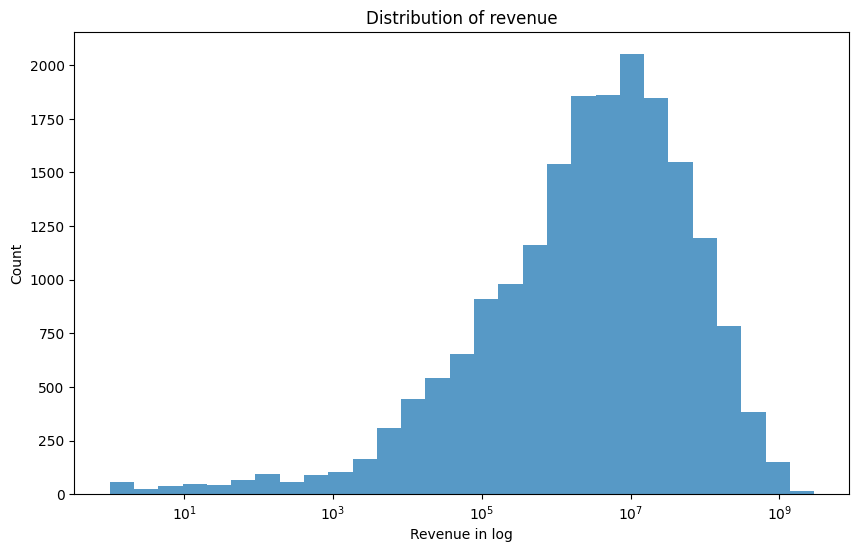

In [24]:
r = df[df['revenue']>0]['revenue']
min_val = r.min()
max_val = r.max()
bins = np.logspace(np.log10(min_val), np.log10(max_val), 30)

plt.figure(figsize=(10, 6))
sns.histplot(r, bins=bins)
plt.title('Distribution of revenue')
plt.xlabel('Revenue in log')
plt.ylabel('Count')
plt.xscale('log')
plt.show()

## Sampling & Train Test Split
### Random split

In [24]:
X_train, X_temp, y_train, y_temp = train_test_split(df.drop(columns=['imdb_rating']), df['imdb_rating'], test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f'Shape of the training set: {X_train.shape}')
print(f'Shape of the validation set: {X_val.shape}')
print(f'Shape of the test set: {X_test.shape}')

Shape of the training set: (336577, 23)
Shape of the validation set: (42072, 23)
Shape of the test set: (42073, 23)


### Stratified split

In [25]:
kbd = KBinsDiscretizer(n_bins=30, encode='ordinal', strategy='quantile')
y_bin = kbd.fit_transform(df[['imdb_rating']])
X_train_str, X_temp_str, y_train_str, y_temp_str = train_test_split(df.drop(columns=['imdb_rating']), df['imdb_rating'], test_size=0.2, random_state=42, stratify=y_bin)
y_temp_str = pd.DataFrame(y_temp_str, columns=['imdb_rating'])
y_test_bin = kbd.transform(y_temp_str)
X_val_str, X_test_str, y_val_str, y_test_str = train_test_split(X_temp_str, y_temp_str, test_size=0.5, random_state=42, stratify=y_test_bin)
print(f'Shape of the training set: {X_train_str.shape}')
print(f'Shape of the validation set: {X_val_str.shape}')
print(f'Shape of the test set: {X_test_str.shape}')

Shape of the training set: (336577, 23)
Shape of the validation set: (42072, 23)
Shape of the test set: (42073, 23)


## Encoding

In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

                              title  vote_average  vote_count    status  \
0                             Ariel      1.057472    0.496653  Released   
1               Shadows in Paradise      1.123489    0.557193  Released   
2                        Four Rooms      0.628361    4.570604  Released   
3                    Judgment Night      0.859421    0.489531  Released   
4  Life in Loops (A Megacities RMX)      1.189507   -0.051763  Released   

  release_date   revenue   runtime    budget original_language  \
0   1988-10-21 -0.066913  0.072088 -0.095737                fi   
1   1986-10-17 -0.066913  0.088074 -0.095737                fi   
2   1995-12-09  0.091302  0.471737  0.456437                en   
3   1993-10-15  0.384128  0.647582  2.803177                en   
4   2006-01-01 -0.066913  0.183989 -0.089939                en   

                     original_title  ...      production_countries  \
0                             Ariel  ...                   Finland   
1           

In [26]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables in the DataFrame:")
print(categorical_vars)

Categorical variables in the DataFrame:
Index(['title', 'status', 'release_date', 'original_language',
       'original_title', 'tagline', 'genres', 'production_companies',
       'production_countries', 'spoken_languages', 'cast', 'director',
       'director_of_photography', 'writers', 'producers', 'music_composer'],
      dtype='object')


In [27]:
finite_categories = ['status', 'original_language', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
for col in finite_categories:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].unique())


Column: status
Unique values: ['Released' 'Post Production' 'Planned' 'In Production']

Column: original_language
Unique values: ['fi' 'en' 'de' 'he' 'es' 'zh' 'ja' 'da' 'fr' 'ko' 'pl' 'sv' 'it' 'bs'
 'hi' 'ru' 'no' 'pt' 'nl' 'el' 'cs' 'bn' 'cn' 'tn' 'sr' 'mn' 'et' 'is'
 'ca' 'ro' 'hu' 'se' 'ps' 'th' 'xx' 'tr' 'sh' 'fa' 'ht' 'bg' 'zu' 'ar'
 'mr' 'ku' 'bo' 'ta' 'tl' 'kk' 'hr' 'id' 'am' 'lt' 'iu' 'pa' 'te' 'sl'
 'vi' 'ml' 'mk' 'sk' 'af' 'ur' 'km' 'nb' 'ms' 'hy' 'uk' 'ka' 'la' 'kn'
 'dz' 'ga' 'eu' 'bm' 'sq' 'gl' 'mo' 'si' 'rw' 'ky' 'eo' 'xh' 'az' 'jv'
 'tg' 'ff' 'lv' 'oc' 'wo' 'ik' 'uz' 'lo' 'ks' 'sm' 'gd' 'cy' 'ln' 'sn'
 'yi' 'tk' 'ab' 'mt' 'sw' 'kl' 'ne' 'fo' 'so' 've' 'lb' 'sa' 'co' 'yo'
 'fy' 'gu' 'sc' 'ig' 'ay' 'mg' 'gn' 'qu' 'cr' 'cv' 'mh' 'mi' 'my' 'to'
 'dv' 'tw' 'or' 'st' 'li' 'as' 'ha' 'ug' 'ak' 'nn' 'be' 'ti' 'ny' 'ty'
 'ss' 'om' 'tt' 'ce' 'rm' 'os' 'nv' 'gv' 'sd' 'lg' 'ba' 'su' 'kg' 'kw'
 'nd' 'sg']

Column: genres
Unique values: ['Comedy, Drama, Romance, Crime' 'Comedy, Dram

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
status_encoded = one_hot_encoder.fit_transform(df[['status']])

status_encoded_df = pd.DataFrame(status_encoded, columns=one_hot_encoder.get_feature_names_out(['status']), index=df.index)
df = pd.concat([df, status_encoded_df], axis=1)

target_encode_cols = ['original_language', 'production_companies', 'production_countries', 'spoken_languages', 'genres']

target_col = 'imdb_rating'

for col in target_encode_cols:
    target_mean = df.groupby(col)[target_col].mean()
    df[f"{col}_target_encoded"] = df[col].map(target_mean)

df.drop(columns=target_encode_cols, inplace=True)

print(df.head())



                              title  vote_average  vote_count    status  \
0                             Ariel      1.057472    0.496653  Released   
1               Shadows in Paradise      1.123489    0.557193  Released   
2                        Four Rooms      0.628361    4.570604  Released   
3                    Judgment Night      0.859421    0.489531  Released   
4  Life in Loops (A Megacities RMX)      1.189507   -0.051763  Released   

  release_date   revenue   runtime    budget  \
0   1988-10-21 -0.066913  0.072088 -0.095737   
1   1986-10-17 -0.066913  0.088074 -0.095737   
2   1995-12-09  0.091302  0.471737  0.456437   
3   1993-10-15  0.384128  0.647582  2.803177   
4   2006-01-01 -0.066913  0.183989 -0.089939   

                     original_title  popularity  ... imdb_rating imdb_votes  \
0                             Ariel    0.451807  ...    0.885003   0.185266   
1              Varjoja paratiisissa    0.680327  ...    0.961262   0.146167   
2                      

## Dimension Reduction:

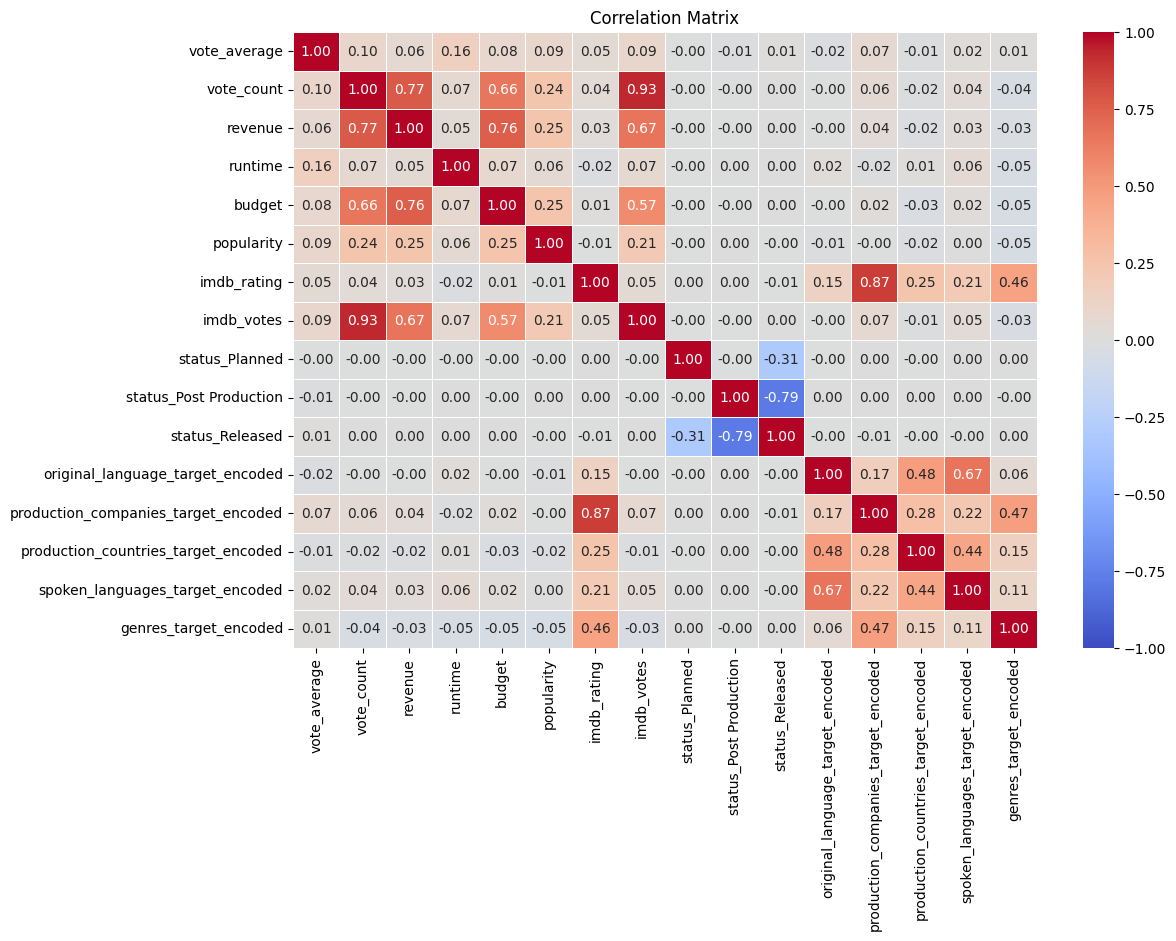

Dropped columns: {'imdb_votes', 'production_companies_target_encoded'}
                              title  vote_average  vote_count    status  \
0                             Ariel      1.057472    0.496653  Released   
1               Shadows in Paradise      1.123489    0.557193  Released   
2                        Four Rooms      0.628361    4.570604  Released   
3                    Judgment Night      0.859421    0.489531  Released   
4  Life in Loops (A Megacities RMX)      1.189507   -0.051763  Released   

  release_date   revenue   runtime    budget  \
0   1988-10-21 -0.066913  0.072088 -0.095737   
1   1986-10-17 -0.066913  0.088074 -0.095737   
2   1995-12-09  0.091302  0.471737  0.456437   
3   1993-10-15  0.384128  0.647582  2.803177   
4   2006-01-01 -0.066913  0.183989 -0.089939   

                     original_title  popularity  ...  \
0                             Ariel    0.451807  ...   
1              Varjoja paratiisissa    0.680327  ...   
2                    

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols]
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


cols_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            cols_to_drop.add(colname)

df.drop(columns=cols_to_drop, inplace=True)

print(f"Dropped columns: {cols_to_drop}")
print(df.head())


## Text Vectorization (RAM issue)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorize_cols = ['title', 'original_title', 'tagline', 'cast', 'director',
                  'director_of_photography', 'writers',
                  'producers', 'music_composer']

vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

for col in vectorize_cols:
    df[col] = df[col].fillna('')

    tfidf_matrix = vectorizer.fit_transform(df[col])

    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)

    df = pd.concat([df, tfidf_df], axis=1)

print(df.head())


KeyboardInterrupt: 